
In the table below, we compare multiple models using the following metrics:

- **Accuracy**: The proportion of total predictions that were correct.
- **Precision**: Out of the predicted positive cases, how many were actually positive.
- **Recall (Sensitivity)**: Out of the actual positive cases, how many were correctly identified.
- **F1 Score**: Harmonic mean of Precision and Recall. Useful when you need a balance between them.
- **ROC AUC**: Measures the model’s ability to distinguish between classes. Higher is better.

These metrics give a complete view of model performance, especially for imbalanced datasets like diabetes prediction.


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.746753,0.625000,0.727273,0.672269,0.742424
1,Random Forest,0.720779,0.607143,0.618182,0.612613,0.812489
2,Gradient Boosting,0.746753,0.637931,0.672727,0.654867,0.809550



### 📈 Understanding the ROC Curve

The **ROC (Receiver Operating Characteristic) Curve** helps evaluate the performance of a binary classification model.

- **X-axis (False Positive Rate)**: The proportion of actual negatives that were incorrectly classified as positive.
- **Y-axis (True Positive Rate / Recall)**: The proportion of actual positives that were correctly classified.

Each point on the curve represents a different threshold used to decide whether a prediction is positive or negative.

- A curve that bows **toward the top-left** indicates better performance.
- The **diagonal line** represents a random classifier.
- The **Area Under the Curve (AUC)** gives a single measure of performance: the closer to 1.0, the better.

In this notebook, we use the ROC curve to visually compare the classification power of Decision Tree, Random Forest, and Gradient Boosting models.


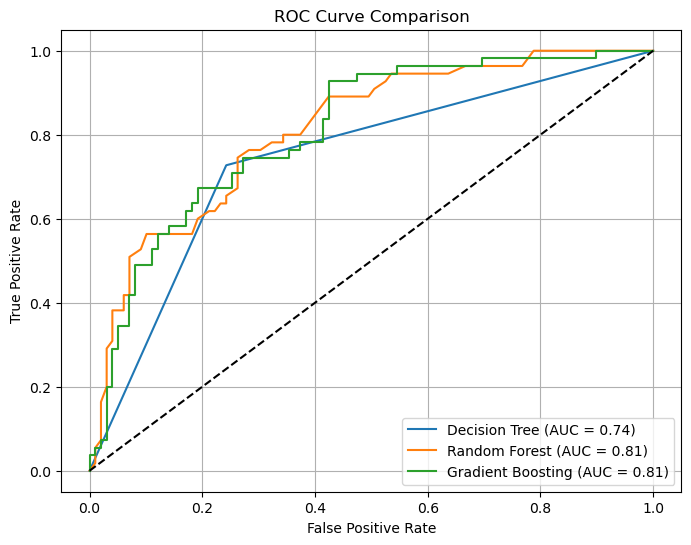


### Summary

- **Best Accuracy**: 0.75 (Decision Tree)
- **Best F1 Score**: 0.67 (Decision Tree)
- **Best ROC AUC**: 0.81 (Random Forest)

📌 Based on this comparison, the model that performs best overall is most likely **Random Forest**.


In [44]:
# Diabetes Model Comparison Notebook

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Thie following line imports "Markdown" and "display" from IPython.display:
# - Markdown(): allows you to write and reder rich text (headers, bold text, bullet points) in the notebook
# - display(): tells Jupter to actually render that Markdown output in a nicely formatted way
from IPython.display import Markdown, display

# Step 2: Load dataset
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 3: Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# StandardScaler standardizes features by removing the mean and scaling to unit variance
# It transforms the data so that each feature has a mean of 0 and standard deviation of 1
# This is important for models that are sensitive to the scale of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train all models
models = {
    # DecisionTreeClassifier buids a single decision tree
    # It splits the data based on feature thresholds to classify examples
    # random_state=42 ensures reproducibility of results
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # RandomForestClassifier is an ensemble model that builds multiple decision trees and combines their results
    # n_estimators=100 means it will build 100 trees
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # GradientBoostingClassifier uses boosting, where each tree tries to correct the previous one
    # learning_rate controls how much each tree contributes to the final prediction
    # Smaller values = slower learning but can lead to better performance with more trees
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# results is a list that will store evaluation metrics for each model
# Each entry will be a dictionary containing model name, accuracy, precision, recall, F1 score, and ROC AUC
results = []
# roc_curves is a dictionary to store the FPR and TPR values for each model
# These values will later be used to lot the ROC curve for each model
roc_curves = {}

# Loop through each model in the dictionary
# models.items() returns both the key (model name) and value (model object)
# For each model, we train (fit) it using the training data
# Then we make predictions on the test data to evaluate preformance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # Get predicted probabilities for the positive class (class 1)
    # Predict proba() returns probabilities for both classes: [:, 0] = class 0, and [:, 1] = class 1
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })
    
    # roc_curve() calculates the False Positive Rate and True Positive Rate for different threshold values
    # These values are used to plot the ROC curve for evaluating classification preformance
    # roc_curve() calculates TPR and FPR at various threshold levels
    # Each threshold is used to convert predicted probabilitis into binary 0/1 predictions and calculates TPR and FPR
    # Every threshold gives a corresponding (FPR, TPR) pair for the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

# Step 5: Explanation of Evaluation Metrics
metrics_explanation = """
In the table below, we compare multiple models using the following metrics:

- **Accuracy**: The proportion of total predictions that were correct.
- **Precision**: Out of the predicted positive cases, how many were actually positive.
- **Recall (Sensitivity)**: Out of the actual positive cases, how many were correctly identified.
- **F1 Score**: Harmonic mean of Precision and Recall. Useful when you need a balance between them.
- **ROC AUC**: Measures the model’s ability to distinguish between classes. Higher is better.

These metrics give a complete view of model performance, especially for imbalanced datasets like diabetes prediction.
"""
display(Markdown(metrics_explanation))

# Step 5: Show comparison table
results_df = pd.DataFrame(results)
display(results_df)

# Step 6: Explanation of ROC Curve
roc_explanation = """
### 📈 Understanding the ROC Curve

The **ROC (Receiver Operating Characteristic) Curve** helps evaluate the performance of a binary classification model.

- **X-axis (False Positive Rate)**: The proportion of actual negatives that were incorrectly classified as positive.
- **Y-axis (True Positive Rate / Recall)**: The proportion of actual positives that were correctly classified.

Each point on the curve represents a different threshold used to decide whether a prediction is positive or negative.

- A curve that bows **toward the top-left** indicates better performance.
- The **diagonal line** represents a random classifier.
- The **Area Under the Curve (AUC)** gives a single measure of performance: the closer to 1.0, the better.

In this notebook, we use the ROC curve to visually compare the classification power of Decision Tree, Random Forest, and Gradient Boosting models.
"""
display(Markdown(roc_explanation))

# Step 7: Plot ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, models[name].predict_proba(X_test_scaled)[:, 1]):.2f})")
    # The label displays the model's name and its AUC score formatted to 2 decimal places
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Summary cell 
# Find the best-performing models
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_f1_model = results_df.loc[results_df['F1 Score'].idxmax()]
best_auc_model = results_df.loc[results_df['ROC AUC'].idxmax()]

# Build the summary string dynamically
summary_md = f"""
### Summary

- **Best Accuracy**: {best_accuracy_model['Accuracy']:.2f} ({best_accuracy_model['Model']})
- **Best F1 Score**: {best_f1_model['F1 Score']:.2f} ({best_f1_model['Model']})
- **Best ROC AUC**: {best_auc_model['ROC AUC']:.2f} ({best_auc_model['Model']})

📌 Based on this comparison, the model that performs best overall is most likely **{best_auc_model['Model']}**.
"""

display(Markdown(summary_md))


